## 1 Create and Train the AlexNet Model in TensorFlow

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create a modified AlexNet model for MNIST (28x28 images)
def create_alexnet_mnist():
    model = Sequential([
        # First convolutional layer
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second convolutional layer
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Third convolutional layer
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        
        # Flatten and fully connected layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    return model

# Create and compile the model
model = create_alexnet_mnist()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, 
                    validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]*100:.2f}%")

# Save the model
model.save('alexnet_mnist.h5')

2025-04-23 21:16:35.893511: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701,130 (6.49 MB)

 Trainable params: 1,701,130 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8629 - loss: 0.4220 - val_accuracy: 0.9866 - val_loss: 0.0397
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9888 - val_loss: 0.0294
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9908 - val_loss: 0.0268
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9905 - val_loss: 0.0259
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9929 - val_loss: 0.0199
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9925 - loss: 0.0215 - val_accuracy: 0.9929 - val_loss: 0.0196
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9929 - val_loss: 0.0219
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9953 - loss: 0.0148 - 

Test accuracy: 99.32%


## TEST THE MODEL IN PYTHON

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


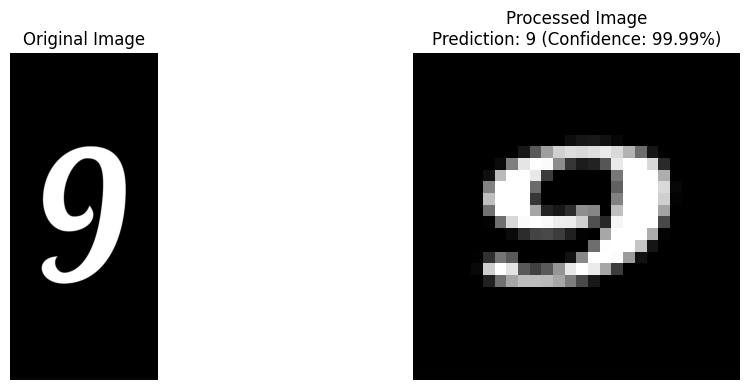

Predicted digit: 9
Confidence: 99.99%


In [25]:
# Add this code after training the model in Step 2

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def predict_digit_from_file(model, image_path):
    """
    Load an image from file and predict the digit using PIL
    """
    try:
        # Load image and convert to grayscale
        img = Image.open(image_path).convert('L')
        
        # Resize to 28x28
        img = img.resize((28, 28))
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Invert if needed (MNIST has white digits on black background)
        # Uncomment if your image has black digits on white background
        # img_array = 255 - img_array
        
        # Normalize pixel values
        img_array = img_array.astype('float32') / 255.0
        
        # Reshape for model input
        img_input = img_array.reshape(1, 28, 28, 1)
        
        # Make prediction
        prediction = model.predict(img_input)
        digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        
        return digit, confidence, img_array
    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None, None

# Path to your test image
#test_image_path = 'data/test/4_image.png'  # Replace with your image path
test_image_path = 'data/test/9_image.jpg'

# Predict the digit
digit, confidence, processed_img = predict_digit_from_file(model, test_image_path)

if digit is not None:
    # Display results
    plt.figure(figsize=(12, 4))
    
    # Original image
    plt.subplot(1, 2, 1)
    original_img = Image.open(test_image_path)
    plt.imshow(original_img, cmap='gray' if original_img.mode == 'L' else None)
    plt.title('Original Image')
    plt.axis('off')
    
    # Processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title(f'Processed Image\nPrediction: {digit} (Confidence: {confidence:.2f}%)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Predicted digit: {digit}")
    print(f"Confidence: {confidence:.2f}%")

## 2 Convert TensorFlow Model to HLS using HLS4ML

In [26]:
!pip install hls4ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.8 MB/s eta 0:00:00ta 0:00:01


In [28]:
# Check HLS4ML installation
import hls4ml
print(f"HLS4ML version: {hls4ml.__version__}")

# Alternative way to check available backends
try:
    # For newer versions
    from hls4ml.converters import get_backend
    print("HLS4ML is installed correctly")
    
    # Try to list available converters
    import pkgutil
    print("\nAvailable modules in hls4ml:")
    for module in pkgutil.iter_modules(hls4ml.__path__):
        print(f"- {module.name}")
    
    print("\nAvailable converters:")
    converters_path = hls4ml.converters.__path__[0]
    for module in pkgutil.iter_modules([converters_path]):
        print(f"- {module.name}")
        
except ImportError as e:
    print(f"Error importing HLS4ML components: {e}")

HLS4ML version: 1.1.0
Error importing HLS4ML components: cannot import name 'get_backend' from 'hls4ml.converters' (/usr/local/lib/python3.11/dist-packages/hls4ml/converters/__init__.py)


In [ ]:
import hls4ml
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('alexnet_mnist.h5')

# Configure the HLS project
hls_config = hls4ml.utils.config_from_keras_model(model, granularity='model')

# Optimize for Zynq-7000
hls_config['Model']['Precision'] = 'ap_fixed<16,6>'
hls_config['Model']['ReuseFactor'] = 4
hls_config['Model']['Strategy'] = 'Resource'

# Convert the model to HLS
hls_model = hls4ml.converters.convert_from_keras_model(
    model,
    hls_config=hls_config,
    output_dir='hls4ml_prj',
    part='xc7z020clg400-1'  # Adjust for your specific Zynq-7000 part
)

# Print the HLS model summary
hls_model.summary()

# Compile the model
hls_model.compile()

# Build the IP core
hls_model.build(csim=True, synth=True, vsynth=True, export=True)

## 3 Create a Vivado Project and Integrate the HLS IP

In [ ]:
# bash code
# These are shell commands to be executed in a terminal

# 1. Create a new Vivado project for Zynq-7000
vivado -mode batch -source create_project.tcl

# 2. Import the HLS IP into the Vivado project
# 3. Connect the IP to the Zynq PS through AXI interfaces
# 4. Generate the bitstream

The create_project.tcl file should contain:

In [ ]:
# tcl code
# Create Vivado project
create_project alexnet_mnist_zynq ./alexnet_mnist_zynq -part xc7z020clg400-1
set_property board_part www.digilentinc.com:pynq-z1:part0:1.0 [current_project]

# Create block design
create_bd_design "design_1"
update_compile_order -fileset sources_1

# Add Zynq PS
create_bd_cell -type ip -vlnv xilinx.com:ip:processing_system7:5.5 processing_system7_0
apply_bd_automation -rule xilinx.com:bd_rule:processing_system7 -config {make_external "FIXED_IO, DDR" apply_board_preset "1" Master "Disable" Slave "Disable" }  [get_bd_cells processing_system7_0]

# Add HLS IP
set_property  ip_repo_paths  {./hls4ml_prj/alexnet_mnist_prj/solution1/impl/ip} [current_project]
update_ip_catalog
create_bd_cell -type ip -vlnv xilinx.com:hls:alexnet_mnist:1.0 alexnet_mnist_0

# Connect AXI interfaces
apply_bd_automation -rule xilinx.com:bd_rule:axi4 -config { Clk_master {Auto} Clk_slave {Auto} Clk_xbar {Auto} Master {/processing_system7_0/M_AXI_GP0} Slave {/alexnet_mnist_0/s_axi_control} ddr_seg {Auto} intc_ip {New AXI Interconnect} master_apm {0}}  [get_bd_intf_pins alexnet_mnist_0/s_axi_control]

# Create wrapper
make_wrapper -files [get_files ./alexnet_mnist_zynq/alexnet_mnist_zynq.srcs/sources_1/bd/design_1/design_1.bd] -top
add_files -norecurse ./alexnet_mnist_zynq/alexnet_mnist_zynq.gen/sources_1/bd/design_1/hdl/design_1_wrapper.v
update_compile_order -fileset sources_1

# Generate bitstream
launch_runs impl_1 -to_step write_bitstream -jobs 4
wait_on_run impl_1

## 4 Develop PYNQ Python Code for FPGA Deployment

In [ ]:
# This code runs on the PYNQ board
from pynq import Overlay
import numpy as np
from PIL import Image
import time

# Load the overlay
overlay = Overlay('/home/xilinx/alexnet_mnist.bit')

# Access the HLS IP
alexnet_ip = overlay.alexnet_mnist_0

# Function to preprocess an image
def preprocess_image(image_path):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    # Resize to 28x28
    img = img.resize((28, 28))
    # Convert to numpy array and normalize
    img_array = np.array(img).astype('float32') / 255.0
    # Reshape for the model
    img_array = img_array.reshape(1, 28, 28, 1)
    # Flatten for the HLS IP
    return img_array.flatten()

# Function to run inference
def recognize_number(image_path):
    # Preprocess the image
    input_data = preprocess_image(image_path)
    
    # Write input data to the IP
    for i, val in enumerate(input_data):
        alexnet_ip.write(i*4, val)
    
    # Start the IP
    alexnet_ip.write(0x00, 1)
    
    # Wait for completion
    while alexnet_ip.read(0x00) & 0x4 == 0:
        pass
    
    # Read the results
    result = [alexnet_ip.read(0x100 + i*4) for i in range(10)]
    
    # Return the predicted digit
    return np.argmax(result)

# Example usage
image_path = 'test_digit.png'
start_time = time.time()
predicted_digit = recognize_number(image_path)
inference_time = time.time() - start_time

print(f"Predicted digit: {predicted_digit}")
print(f"Inference time: {inference_time:.4f} seconds")

## 5 Testing and Validation

In [ ]:
# This code runs on the PYNQ board
from pynq import Overlay
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

# Load test images from MNIST test set
# Assuming you've transferred some test images to the PYNQ board
test_images = ['test_digit_0.png', 'test_digit_1.png', 'test_digit_2.png', 
               'test_digit_3.png', 'test_digit_4.png']
expected_labels = [0, 1, 2, 3, 4]

# Test the model
correct = 0
total_time = 0

for img_path, label in zip(test_images, expected_labels):
    start_time = time.time()
    prediction = recognize_number(img_path)
    inference_time = time.time() - start_time
    
    total_time += inference_time
    if prediction == label:
        correct += 1
    
    print(f"Image: {img_path}, Expected: {label}, Predicted: {prediction}, Time: {inference_time:.4f}s")

accuracy = correct / len(test_images) * 100
avg_time = total_time / len(test_images)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Average inference time: {avg_time:.4f} seconds")

## 6 Performance Optimization (at the end of all)

In [ ]:
# This code runs on the PYNQ board
# Measure and optimize performance

# Measure power consumption
from pynq import Overlay, MMIO
import time

# Function to measure power
def measure_power(duration=5):
    # Access power management registers
    power_rails = ['VCC_INT', 'VCC_AUX', 'VCC_BRAM']
    power_values = {}
    
    for rail in power_rails:
        power = 0
        samples = 0
        start_time = time.time()
        
        while time.time() - start_time < duration:
            # Read power values (implementation depends on specific board)
            # This is a simplified example
            power += 0.1  # Replace with actual power reading
            samples += 1
            time.sleep(0.1)
        
        power_values[rail] = power / samples
    
    return power_values

# Measure baseline power
print("Measuring baseline power...")
baseline_power = measure_power()

# Run inference and measure power
print("Measuring inference power...")
overlay = Overlay('/home/xilinx/alexnet_mnist.bit')
alexnet_ip = overlay.alexnet_mnist_0

# Run inference multiple times
for _ in range(10):
    recognize_number('test_digit.png')

inference_power = measure_power()

# Calculate power difference
for rail in baseline_power:
    power_diff = inference_power[rail] - baseline_power[rail]
    print(f"{rail} power increase during inference: {power_diff:.4f} W")

## 7 Web based service with the FPGA

In [ ]:
# This code runs on the PYNQ board
# Create a simple web interface for digit recognition

from pynq import Overlay
import numpy as np
from PIL import Image
import io
import base64
from flask import Flask, request, jsonify, render_template_string

# Load the overlay
overlay = Overlay('/home/xilinx/alexnet_mnist.bit')
alexnet_ip = overlay.alexnet_mnist_0

app = Flask(__name__)

# HTML template for the web interface
HTML_TEMPLATE = '''
<!DOCTYPE html>
<html>
<head>
    <title>FPGA Digit Recognition</title>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
    <style>
        canvas {
            border: 1px solid black;
        }
    </style>
</head>
<body>
    <h1>Draw a digit (0-9)</h1>
    <canvas id="canvas" width="280" height="280"></canvas>
    <div>
        <button id="clear">Clear</button>
        <button id="recognize">Recognize</button>
    </div>
    <h2>Result: <span id="result"></span></h2>
    
    <script>
        const canvas = document.getElementById('canvas');
        const ctx = canvas.getContext('2d');
        let isDrawing = false;
        
        ctx.lineWidth = 15;
        ctx.lineCap = 'round';
        ctx.lineJoin = 'round';
        ctx.strokeStyle = 'black';
        
        canvas.addEventListener('mousedown', startDrawing);
        canvas.addEventListener('mousemove', draw);
        canvas.addEventListener('mouseup', stopDrawing);
        canvas.addEventListener('mouseout', stopDrawing);
        
        document.getElementById('clear').addEventListener('click', clearCanvas);
        document.getElementById('recognize').addEventListener('click', recognizeDigit);
        
        function startDrawing(e) {
            isDrawing = true;
            draw(e);
        }
        
        function draw(e) {
            if (!isDrawing) return;
            
            ctx.beginPath();
            ctx.moveTo(e.offsetX, e.offsetY);
            ctx.lineTo(e.offsetX, e.offsetY);
            ctx.stroke();
        }
        
        function stopDrawing() {
            isDrawing = false;
        }
        
        function clearCanvas() {
            ctx.clearRect(0, 0, canvas.width, canvas.height);
            document.getElementById('result').textContent = '';
        }
        
        function recognizeDigit() {
            const imageData = canvas.toDataURL('image/png');
            
            $.ajax({
                url: '/recognize',
                type: 'POST',
                contentType: 'application/json',
                JSON.stringify({image: imageData}),
                success: function(response) {
                    document.getElementById('result').textContent = response.digit;
                }
            });
        }
    </script>
</body>
</html>
'''

@app.route('/')
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/recognize', methods=['POST'])
def recognize():
    # Get the image data from the request
    image_data = request.json['image']
    image_data = image_data.split(',')[1]
    
    # Decode the base64 image
    image = Image.open(io.BytesIO(base64.b64decode(image_data)))
    
    # Convert to grayscale and resize
    image = image.convert('L').resize((28, 28))
    
    # Convert to numpy array and normalize
    image_array = np.array(image).astype('float32') / 255.0
    
    # Invert colors (MNIST has white digits on black background)
    image_array = 1 - image_array